<a href="https://colab.research.google.com/github/massimocipressi/MLPNS_MCipressi/blob/main/MPLNS_4_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as pl
import scipy as sp
from scipy.spatial.distance import cdist #cdist calcola la distanza di un punto da tutti gli altri

In [2]:
np.random.seed(166)
#facciamo 100 punti in uno spazio 2D distribuiti normalmente
data = np.random.randn(100,2)
#devo creare anche la label
labels = np.random.randint(0,2,100)
labels

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

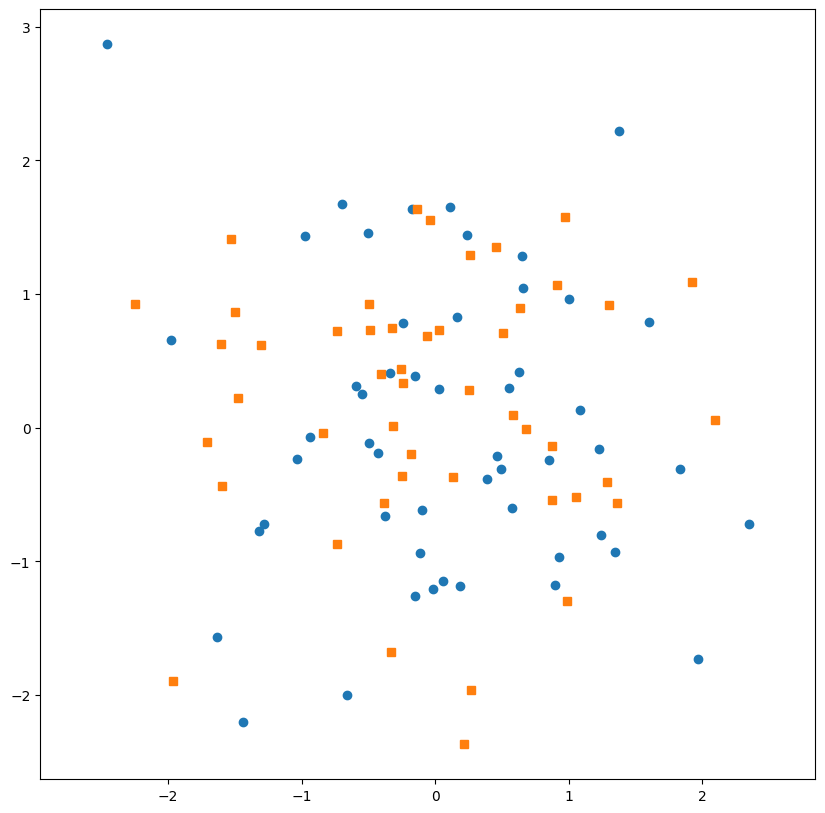

In [3]:
ax = pl.figure(figsize = (10,10)).add_subplot(111)
ax.axis("equal")
ax.plot(data[:,0][labels==0],data[:,1][labels==0],'o');
ax.plot(data[:,0][labels==1],data[:,1][labels==1],'s');

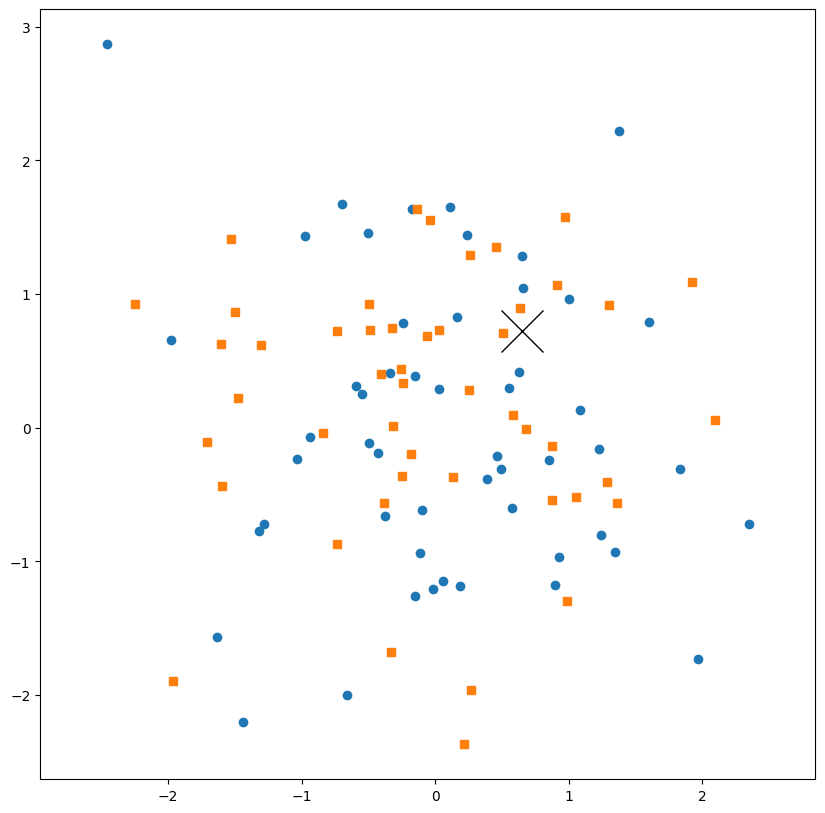

In [4]:
testparticle = np.random.randn(2)
ax = pl.figure(figsize = (10,10)).add_subplot(111)
ax.axis("equal")
ax.plot(data[:,0][labels==0],data[:,1][labels==0],'o');
ax.plot(data[:,0][labels==1],data[:,1][labels==1],'s');
ax.plot(testparticle[0],testparticle[1],'kx',ms=30,lw=3);

In [35]:
np.atleast_2d?

In [36]:
#cdist fa distanza fra cose strutturate uguali, per rendere la mia particella 2D faccio
d = cdist(np.atleast_2d(testparticle), data)

In [6]:
k = 1
#argmin mi dà la posizione del minimo
labeltest = labels[np.argmin(d)]

<ipython-input-7-649df855d6ef>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.
  ax.plot(testparticle[0],testparticle[1],'kx',ms=30,lw=3,color=colors[labeltest]);


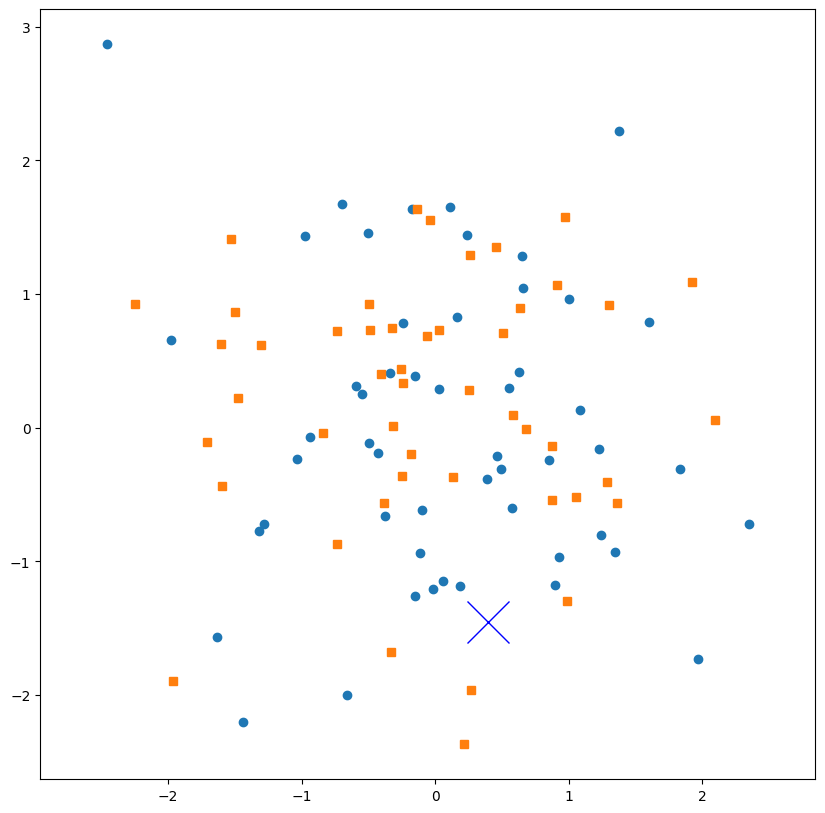

In [7]:
testparticle = np.random.randn(2)

d = cdist(np.atleast_2d(testparticle), data)
labeltest = labels[np.argmin(d)]

ax = pl.figure(figsize = (10,10)).add_subplot(111)
ax.axis("equal")
colors = ["blue","orange"]
ax.plot(data[:,0][labels==0],data[:,1][labels==0],'o');
ax.plot(data[:,0][labels==1],data[:,1][labels==1],'s');
ax.plot(testparticle[0],testparticle[1],'kx',ms=30,lw=3,color=colors[labeltest]);

In [48]:
d = cdist(np.atleast_2d(testparticle), data)
k = 5
#argsort mi dà gli indici del riordinamento
prova=data[np.argsort(d)]
#per qualche motivo prova è (1,100,2) e allora specifico quello 0
nns = prova[0][:k]
nns

array([[ 0.1868196 , -1.18313604],
       [ 0.06100886, -1.14631178],
       [-0.01966921, -1.21002871],
       [ 0.26963738, -1.95971383],
       [ 0.8972225 , -1.17480502]])

In [9]:
nnslabel = labels[np.argsort(d)][0][:k]
nnslabel

array([0, 0, 0, 1, 0])

In [10]:
labeltest2 = 0 if (nnslabel == 0).sum() > (nnslabel == 1).sum() else 1

<ipython-input-11-0dc3fd76f7ee>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.
  ax.plot(testparticle[0],testparticle[1],'kx',ms=30,lw=3,color=colors[labeltest2]);


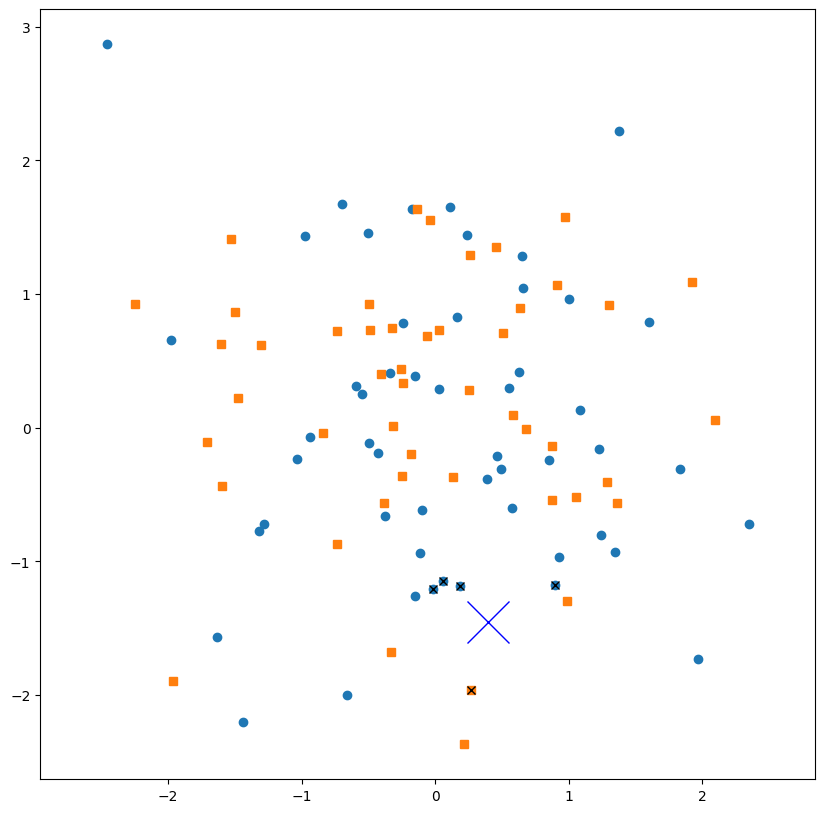

In [11]:
ax = pl.figure(figsize = (10,10)).add_subplot(111)
ax.axis("equal")
colors = ["blue","orange"]
ax.plot(data[:,0][labels==0],data[:,1][labels==0],'o');
ax.plot(data[:,0][labels==1],data[:,1][labels==1],'s');
ax.plot(testparticle[0],testparticle[1],'kx',ms=30,lw=3,color=colors[labeltest2]);
ax.plot(nns[:,0],nns[:,1],'kx')

In [12]:
#andiamo a connetterci a google drive
#ci entriamo
#creiamo una cartella
#ci mettiamo dei file dal web

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [15]:
!mkdir MLPNS2023

mkdir: cannot create directory ‘MLPNS2023’: File exists


In [16]:
cd MLPNS2023

/content/drive/MyDrive/MLPNS2023


In [17]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

--2023-04-05 16:21:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10782 (11K) [application/x-httpd-php]
Saving to: ‘wine.data.1’

wine.data.1         100%[===================>]  10.53K  --.-KB/s    in 0.006s  

2023-04-05 16:21:15 (1.71 MB/s) - ‘wine.data.1’ saved [10782/10782]



In [18]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names

--2023-04-05 16:21:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3036 (3.0K) [application/x-httpd-php]
Saving to: ‘wine.names.1’

wine.names.1        100%[===================>]   2.96K  --.-KB/s    in 0s      

2023-04-05 16:21:15 (51.3 MB/s) - ‘wine.names.1’ saved [3036/3036]



In [19]:
#la prima colonna del dataset è la label il resto sono le feature
import pandas as pd

In [20]:
wines = pd.read_csv("wine.data", header=None)
wines

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [21]:
columns = {0:"quality",
           1:"Alcohol",2:"Malic acid",3:"Ash",4:"Alcalinity of ash",5:"Magnesium",
          6:"Total phenols",7:"Flavanoids",8:"Nonflavanoid phenols",9:"Proanthocyanins",
          10:"Color intensity",11:"Hue",12:"OD280/OD315 of diluted wines",13:"Proline"}
wines.rename(columns=columns, inplace=True)
wines

,quality,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [22]:
from sklearn import preprocessing
#non voglio fare scaling sulla qualità che sarà la mia label
X = preprocessing.scale(wines.iloc[:,1:],axis=0)

In [23]:
X.mean(axis=0)

array([-8.38280756e-16, -1.19754394e-16, -8.37033314e-16, -3.99181312e-17,
       -3.99181312e-17,  0.00000000e+00, -3.99181312e-16,  3.59263181e-16,
       -1.19754394e-16,  2.49488320e-17,  1.99590656e-16,  3.19345050e-16,
       -1.59672525e-16])

Text(0.5, 1.0, 'true labels')

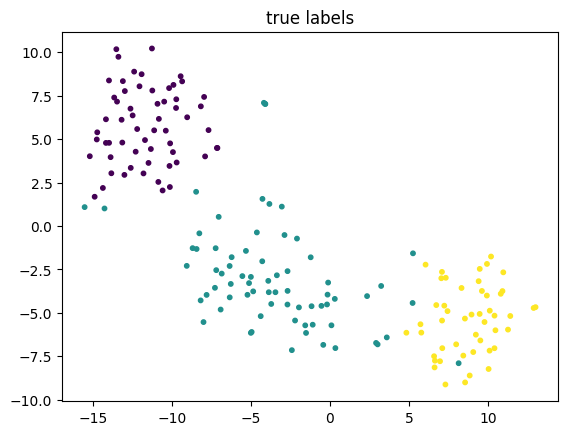

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, wines["quality"], random_state=302)
import sklearn.manifold as man #qui usiamo un metodo per riproiettare i dati su uno spazio 2D
tsne_wines = man.TSNE(n_components=2, perplexity=30.0, early_exaggeration=90.0,
                      random_state=302).fit(X)
wine_proj = tsne_wines.fit_transform(X)
wine_proj_test = tsne_wines.fit_transform(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay
_, ax = plt.subplots()

#colore prende valori da 0 a 1 (in una qualche heatmap)
ax.scatter(wine_proj.T[0], wine_proj.T[1], s=10, c = wines["quality"]/3);
ax.set_title("true labels")

In [25]:
import sklearn.neighbors as  nb
clf = nb.KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)
#training

KNeighborsClassifier()

In [26]:
#poi uso il mio modello sul test
pred = clf.predict(X_test)
pred

array([2, 3, 2, 3, 2, 3, 3, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 3, 3, 1, 1,
       2, 3, 2, 1, 2, 1, 1, 3, 3, 1, 1, 3, 3, 3, 2, 1, 1, 2, 1, 1, 2, 3,
       3])

In [27]:
#posso interpretare la frequenza delle k label in modo probabilistico, c'è un comando

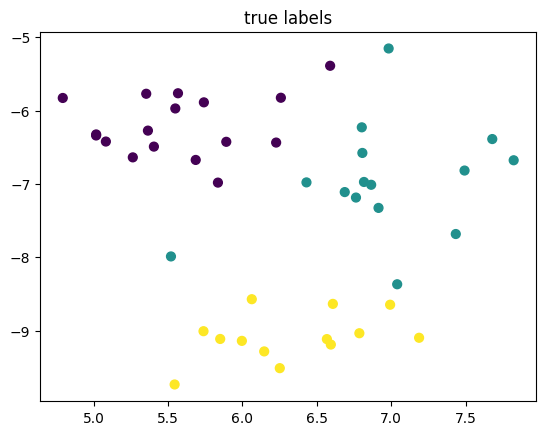

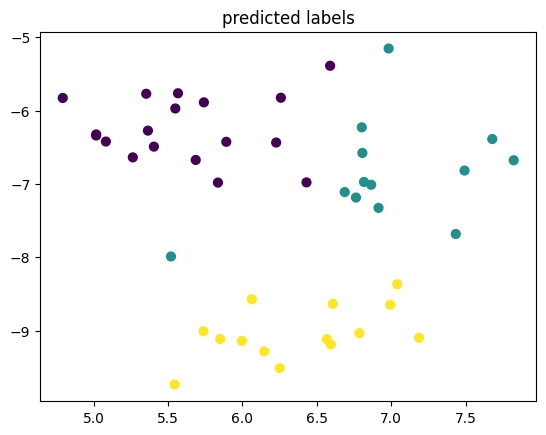

In [28]:
_, ax = plt.subplots()
ax.scatter(wine_proj_test.T[0], wine_proj_test.T[1], s=40, c = y_test/3);
ax.set_title("true labels")

_, ax = plt.subplots(1)

ax.scatter(wine_proj_test.T[0], wine_proj_test.T[1], s=40, c = pred/3);
ax.set_title("predicted labels");

In [29]:
#valutazione della classificazione
#matrice di confusione